<a href="https://colab.research.google.com/github/Steel3264/AI/blob/main/AI_W11_14_4_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.utils.image_utils import load_img
from keras.utils.image_dataset import load_image
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/AI/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('D'):
    output = 1 
  if file.startswith('Dien'):
    output = 2
  img = load_img(folder + file,target_size=(200,200))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('D_Dien_photos.npy', photos)
save('D_Dien_labels.npy', labels)

(150, 200, 200, 3) (150,)


In [3]:
import numpy as np
np.load('/content/D_Dien_photos.npy')
np.load('/content/D_Dien_labels.npy')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

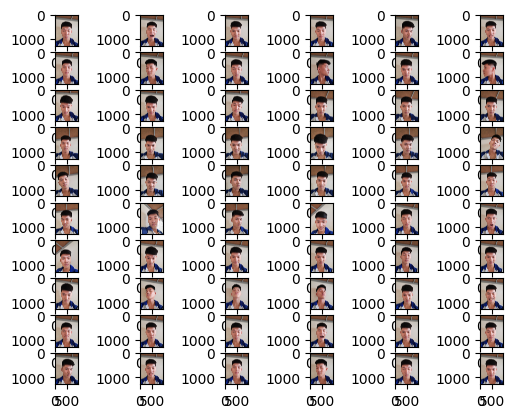

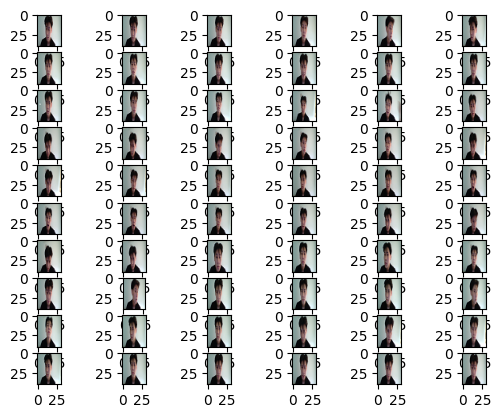

In [4]:
import matplotlib.pyplot as plt 
from matplotlib.image import imread 

folder = '/content/drive/MyDrive/AI/'
for i in range(60):
  plt.subplot(10,6,i+1)
  filename = folder + 'D'+str(i+1)+'.jpg'
  img = imread(filename) 
  plt.imshow(img)
plt.show()

for i in range(60):
  plt.subplot(10,6,i+1)
  filename = folder + 'Dien ('+str(i+1)+').png'
  img = imread(filename) 
  plt.imshow(img)
plt.show()

4422102/4422102 [==============================] - 0s 0us/step


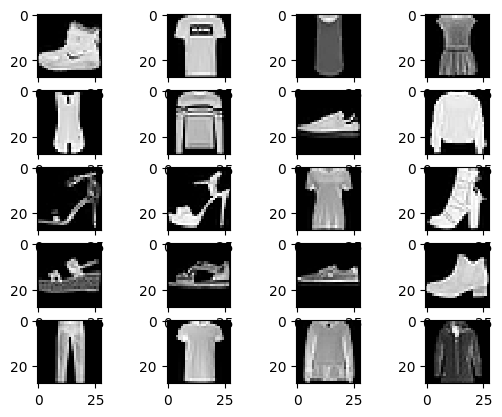

(60000, 10)
(10000, 10)


In [5]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.imshow(x_train[i],cmap='gray',
               interpolation='none')
plt.show()

x_train = x_train.reshape(60000, 28,28,1)
x_train = x_train.astype('float32')/255

x_test = x_test.reshape(10000, 28,28,1)
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)




In [12]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

model=Sequential()
#1
model.add(Conv2D(32, kernel_size=(3,3), activation='linear',
                 input_shape=(28,28,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

#2
model.add(Conv2D(64,(3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(128,(3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#CNN
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10, activation='softmax'))
model.summary()

from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])
train = model.fit(x_train,y_train,batch_size=64,epochs=20, verbose=1)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                 

In [11]:
model.save('CNN.h5')

Test less: 0.43056339025497437
Test accuracy: 0.923799991607666


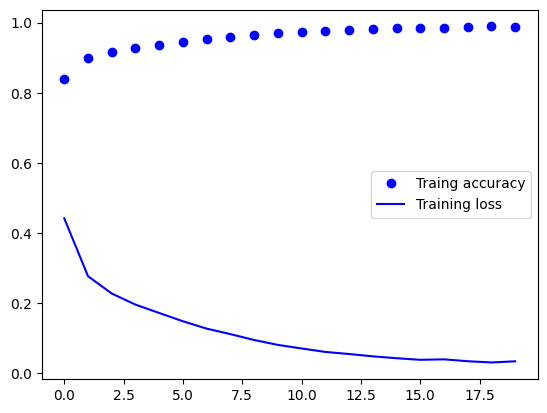

In [16]:

test = model.evaluate(x_test, y_test, verbose =0)
print('Test less:', test[0])
print('Test accuracy:', test[1])
loss=train.history['loss']
accuracy=train.history['accuracy']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label='Traing accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.legend()
plt.show()